# Telecom Customer Churn Prediction

Churn means how many people leave your company, like for example if they cancel their phone plan with the Telco company.

The record contains information about:

- Whether customers have canceled within the last month — the column is called “Churn”.
- **Services each customer has signed up for** — phone, multiple lines, internet, online security, online backup, device protection, tech support, and TV and movie streaming
- **Customer account information** — how long they have been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- **Customer demographic information** — gender, age range, and whether they have partners and dependents

## Importing Libraries dan Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
sns.set()
import datetime as dt
import warnings
sns.set(style='whitegrid')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
import matplotlib.colors 
from collections import Counter
cmap2 = cm.get_cmap('twilight',13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))

In [3]:
df = pd.read_csv('C:/Users/mhmdn/Documents/Skills & Career/Projects/Data Science/Telecom Churn Prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data Understanding

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.describe(include = 'O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [10]:
for i in list(df.columns):
    print("{} -> {}".format(i, df[i].value_counts().shape[0]))

customerID -> 7043
gender -> 2
SeniorCitizen -> 2
Partner -> 2
Dependents -> 2
tenure -> 73
PhoneService -> 2
MultipleLines -> 3
InternetService -> 3
OnlineSecurity -> 3
OnlineBackup -> 3
DeviceProtection -> 3
TechSupport -> 3
StreamingTV -> 3
StreamingMovies -> 3
Contract -> 3
PaperlessBilling -> 2
PaymentMethod -> 4
MonthlyCharges -> 1585
TotalCharges -> 6531
Churn -> 2


## Data Preperation

In [11]:
#Checking the missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#Convert TotalCharges data type to numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
p = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
t = df.isnull().sum().sort_values(ascending=False)

m_data = pd.concat([t, p], axis=1, keys=['Total', 'Percent'])
m_data

,Total,Percent
TotalCharges,11,0.001562
customerID,0,0.000000
DeviceProtection,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


In [14]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [16]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [17]:
df = df.fillna(df["TotalCharges"].mean())

In [18]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
#Convert SeniorCitizen data type to object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [20]:
#Getting all the categorical columns except the target
categorical_columns = df.select_dtypes(exclude = 'number').drop('Churn', axis = 1).columns

## Exploratory Data Analysis (EDA)

In [21]:
#Checking the churn columns
display(df.Churn.value_counts(normalize=True))

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

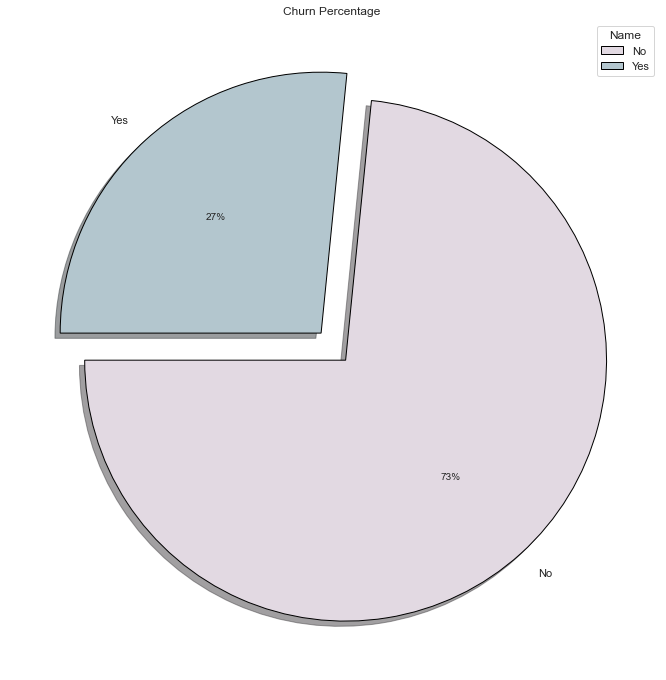

In [22]:
#Churn percentage plot
plt.figure(figsize=(20,12))
churn_plot = df['Churn'].value_counts().head(10)
plt.pie(x=churn_plot,labels=churn_plot.index,colors=colors1,autopct='%.0f%%',explode=[0.07 for i in churn_plot.index],startangle=180,wedgeprops={'linewidth':1,'edgecolor':'black'},shadow=True)
plt.title('Churn Percentage ')
plt.legend(loc='upper right',title='Name')


plt.show()

- Based on the table and graph above, the dataset that we use has imbalanced data between churn and non-churn customers.  74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn.

## Univariate Analysis

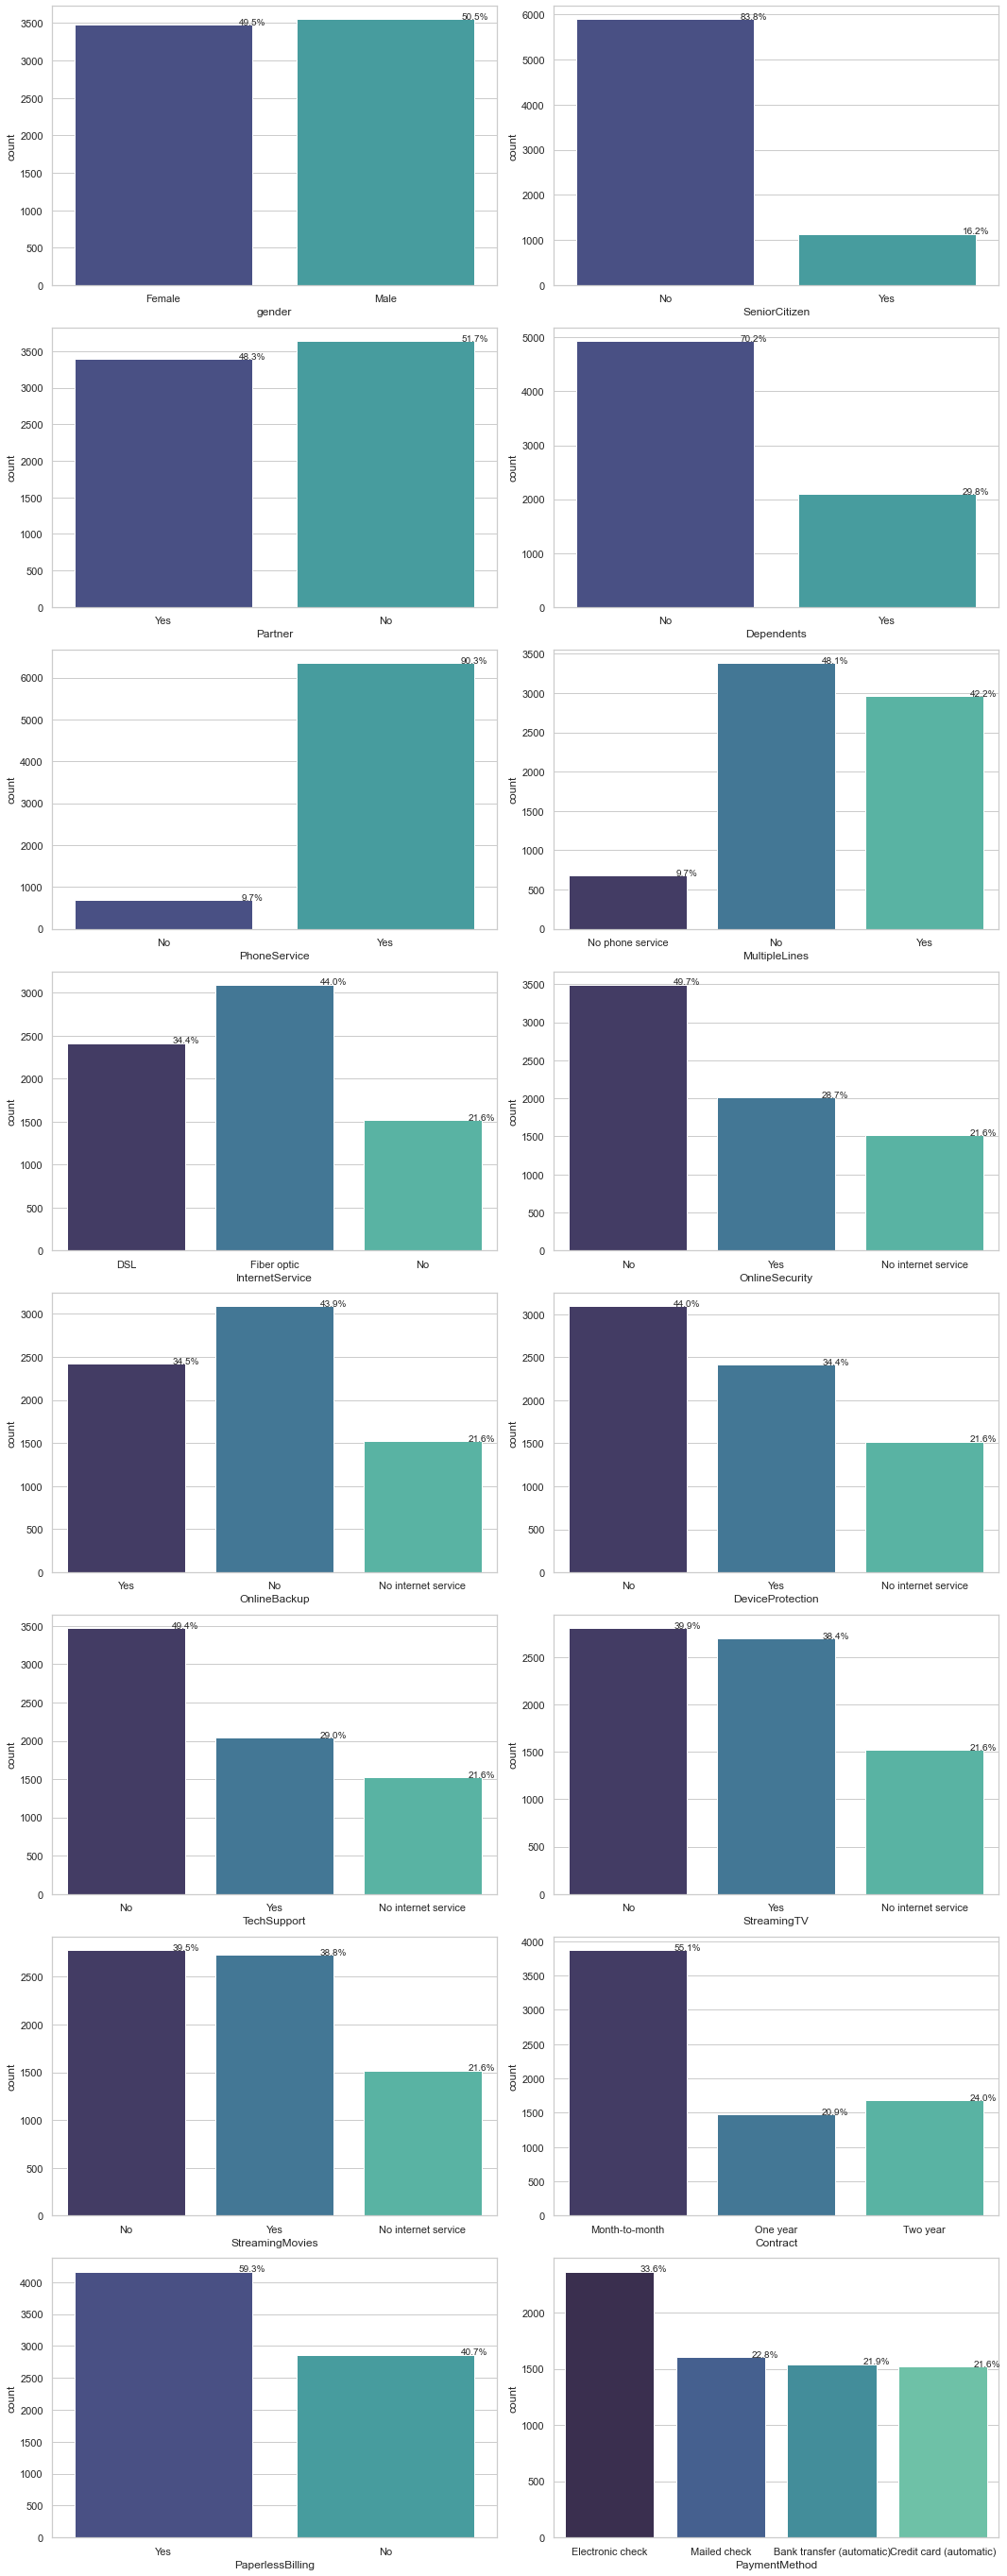

In [23]:
# Categorical analysis
total = float(len(df))
fig, ax = plt.subplots(8, 2, figsize=(15,38))
ax = ax.flatten()

for i, predictor in enumerate(categorical_columns.drop(['customerID'])):
    q = sns.countplot(data=df, x=predictor, palette='mako', ax=ax[i])
    for p in q.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        q.annotate(percentage, (x, y),ha='center')
        
plt.tight_layout()
plt.show()

**Observations:**

- The number of customers based on gender is almost balanced between women and men.
- Most customers are customers who are at a young age and only 16% are seniors.
- About 51% of the customers have a partner, while only 30% of the total customers have dependents.
- Based on the graph above, the majority of customers are in month-to-month contracts with around 55%. While there are equal number of customers in the 1 year and 2 year contracts.

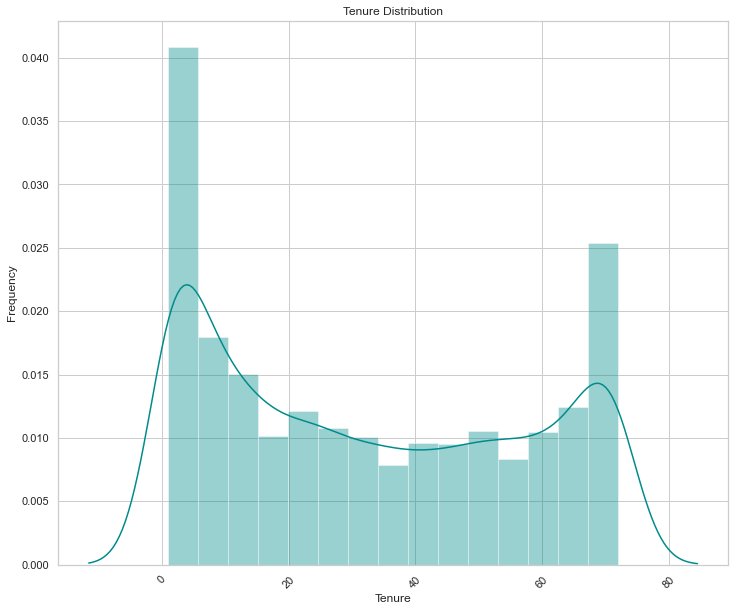

In [24]:
# Tenure Distribution
plt.figure(figsize=(12,10))
sns.distplot(x=df['tenure'], color='darkcyan',kde=True,hist=True); 
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

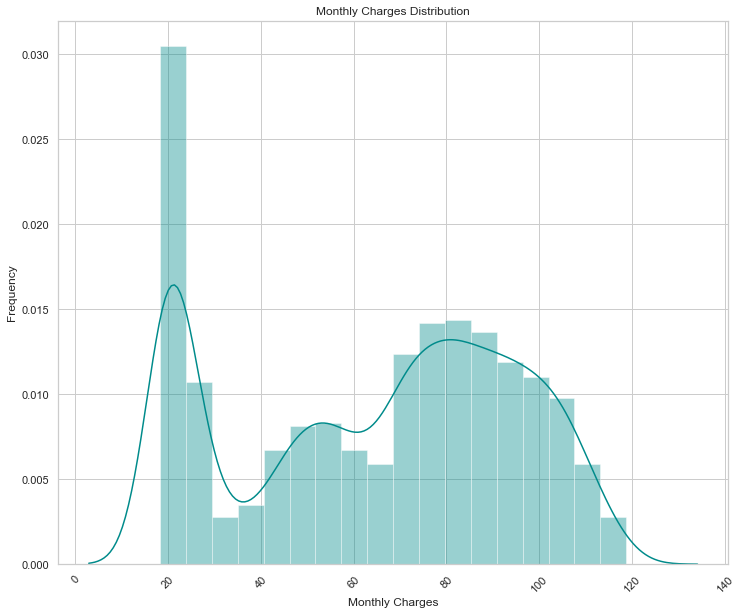

In [25]:
# Tenure Distribution
plt.figure(figsize=(12,10))
sns.distplot(x=df['MonthlyCharges'], color='darkcyan',kde=True,hist=True); 
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()


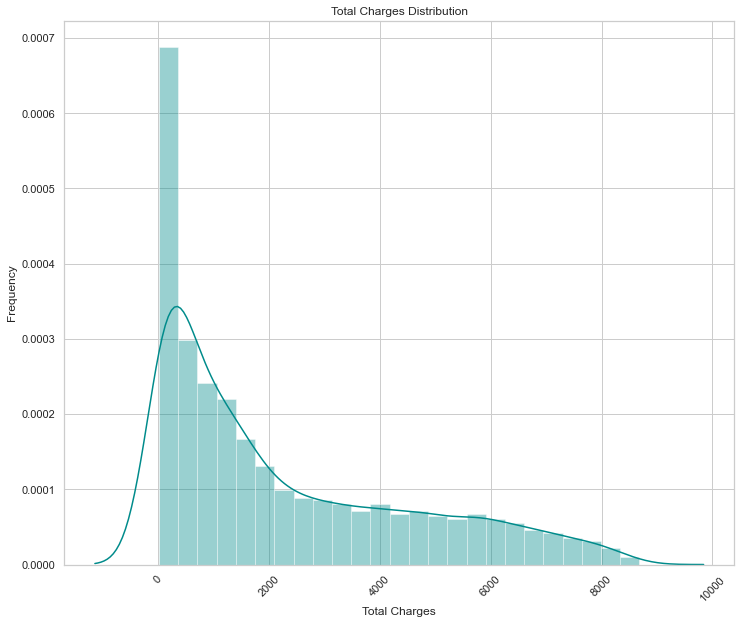

In [26]:
# Tenure Distribution
plt.figure(figsize=(12,10))
sns.distplot(x=df['TotalCharges'], color='darkcyan',kde=True,hist=True); 
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()


- Based on the histogram chart above, many customers are with the company for only about a month and many are with 72 months. This can be caused by many customers who are at different contract levels. Thus based on the contract they are into it could be more/less easier for the customer to stay/leave the telecom company.

## Bivariate Analysis

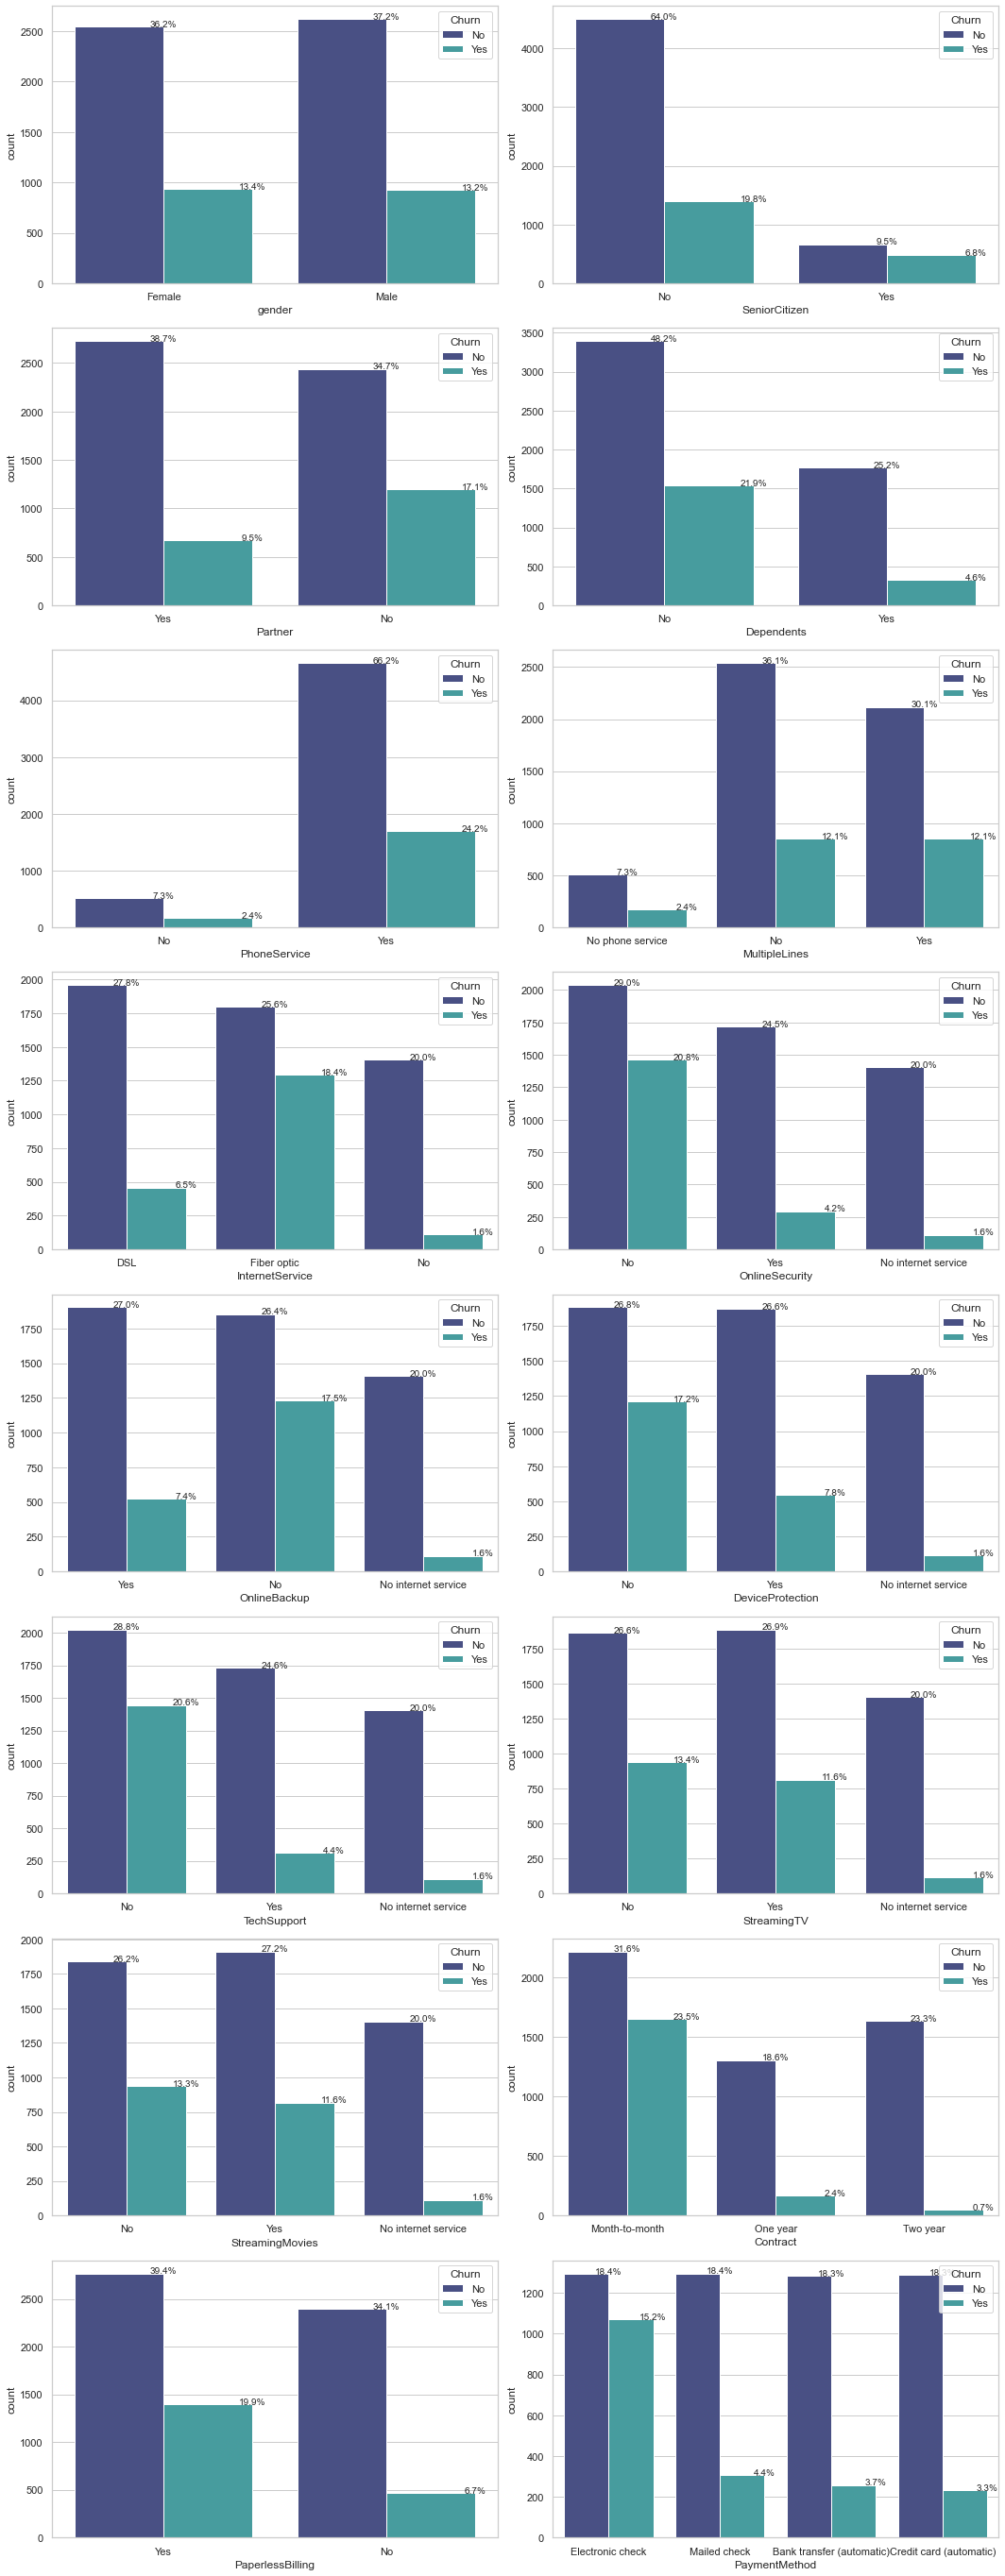

In [27]:
total = float(len(df))
fig, ax = plt.subplots(8, 2, figsize=(15,38))
ax = ax.flatten()

for i, predictor in enumerate(categorical_columns.drop(['customerID'])):
    q = sns.countplot(data=df, x=predictor, hue='Churn', palette='mako', ax=ax[i])
    for p in q.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        q.annotate(percentage, (x, y),ha='center')
        
plt.tight_layout()
plt.show()

**Observations:**

- Based on the graph above, there is no significant difference in the number of lost customers by gender.
- Most of the customers have no dependants and customers who do not have dependants have a tendency to churn compared to customers who have dependants
- Customers who use fiber optic internet services have more customers switching than other internet services
- Most of the customers choose a month-to-month contract and the number of customers who switch by month-to-month category is more than any other contract category.
- Customers who have fiber optic internet service have more lost customers than other internet services. This shows that The existence of an Internet contract has a clear influence, customers without a connection are less willing to switch, and the higher the quality of the connection, the higher the proportion of lost customers.
- Customers who have a month to month contract have a very high churn rate.
- Senior Citizens have almost double the churn rate than younger population.

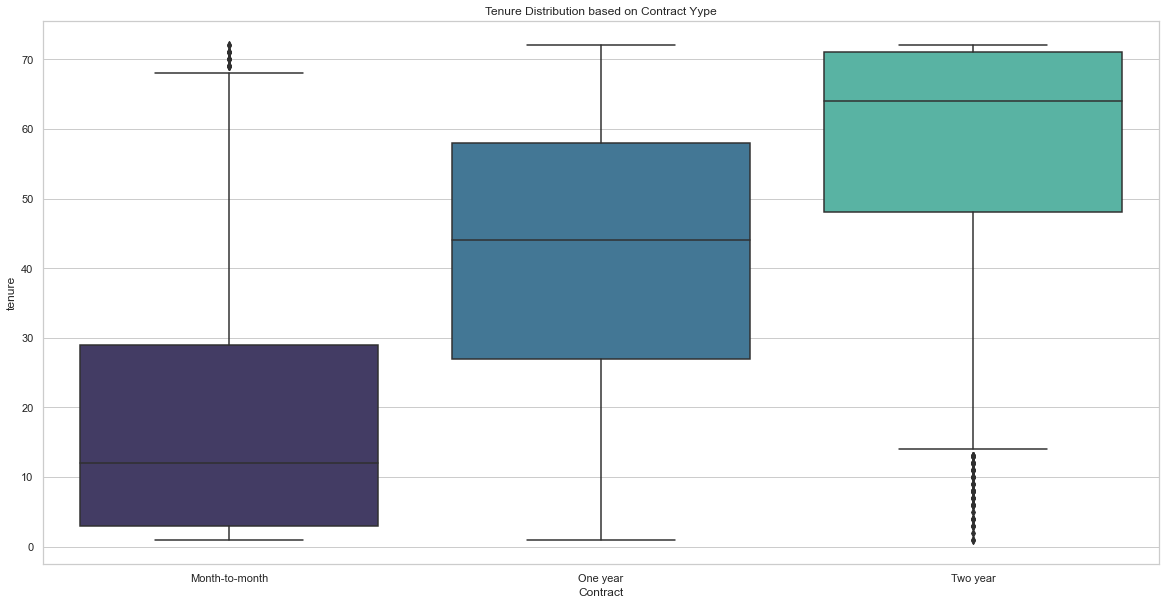

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Contract", y="tenure", data=df, palette='mako')
plt.title('Tenure Distribution based on Contract Yype')

plt.show()

- Based on the graph above, it can be seen that the type of contract has a high correlation with tenure, namely the longer the contract, the longer the tenure.

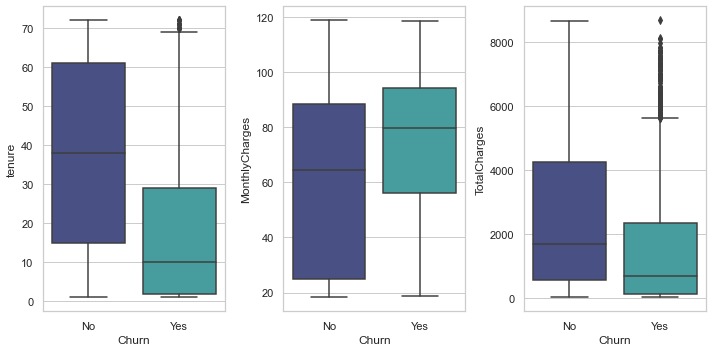

In [29]:
column_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, ax = plt.subplots(1, 3, figsize=(10,5), sharey=False)
ax = ax.flatten()

for i, col in enumerate(column_list):
  sns.boxplot(data=df, x='Churn', y=col, palette='mako', ax=ax[i])

plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

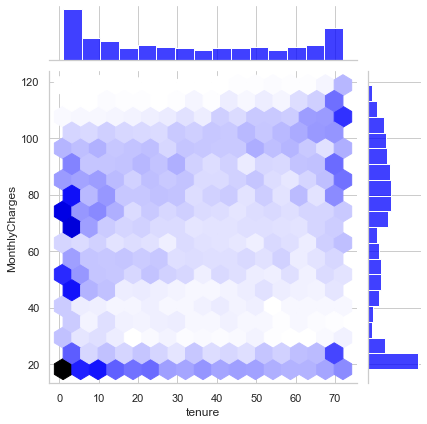

In [30]:
plt.figure(figsize=(20,20))
sns.jointplot(x="tenure", y="MonthlyCharges", data=df, kind="hex", color='Blue')

plt.show()

<Figure size 1440x1440 with 0 Axes>

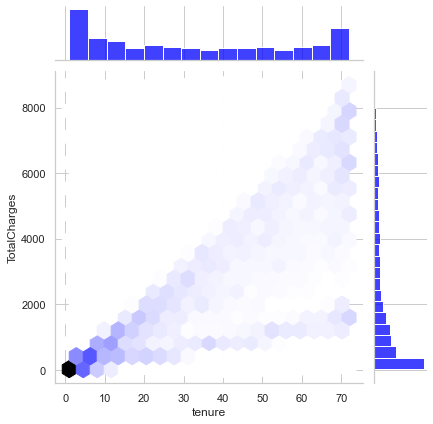

In [31]:
plt.figure(figsize=(20,20))
sns.jointplot(x="tenure", y="TotalCharges", data=df, kind="hex", color='Blue')

plt.show()

<Figure size 1440x1440 with 0 Axes>

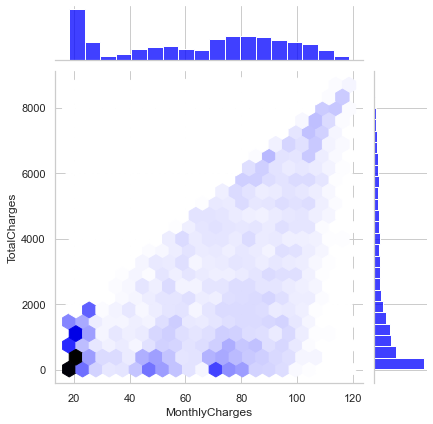

In [32]:
plt.figure(figsize=(20,20))
sns.jointplot(x="MonthlyCharges", y="TotalCharges", data=df, kind="hex", color='Blue')

plt.show()

**Observations:**
- We will observe that the total charges increases as the monthly bill for a customer increases.
- There is no clear pattern between the relationship between monthly charges and tenure customers

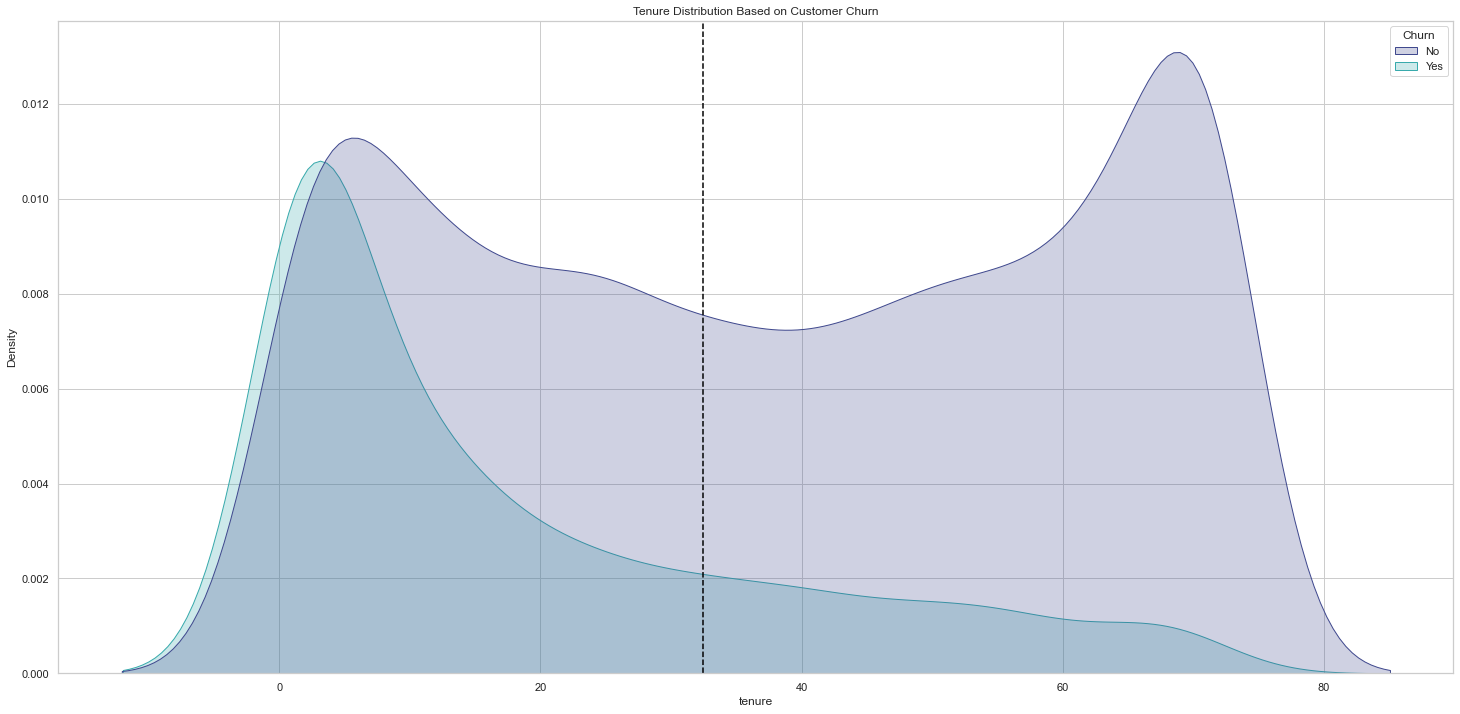

In [33]:
plt.figure(figsize=(25,12))
sns.kdeplot(df["tenure"], hue=df["Churn"], fill=True, linewidth=1, palette='mako')
plt.axvline(df['tenure'].mean(), c='black',ls='--')
plt.title("Tenure Distribution Based on Customer Churn")

plt.show()

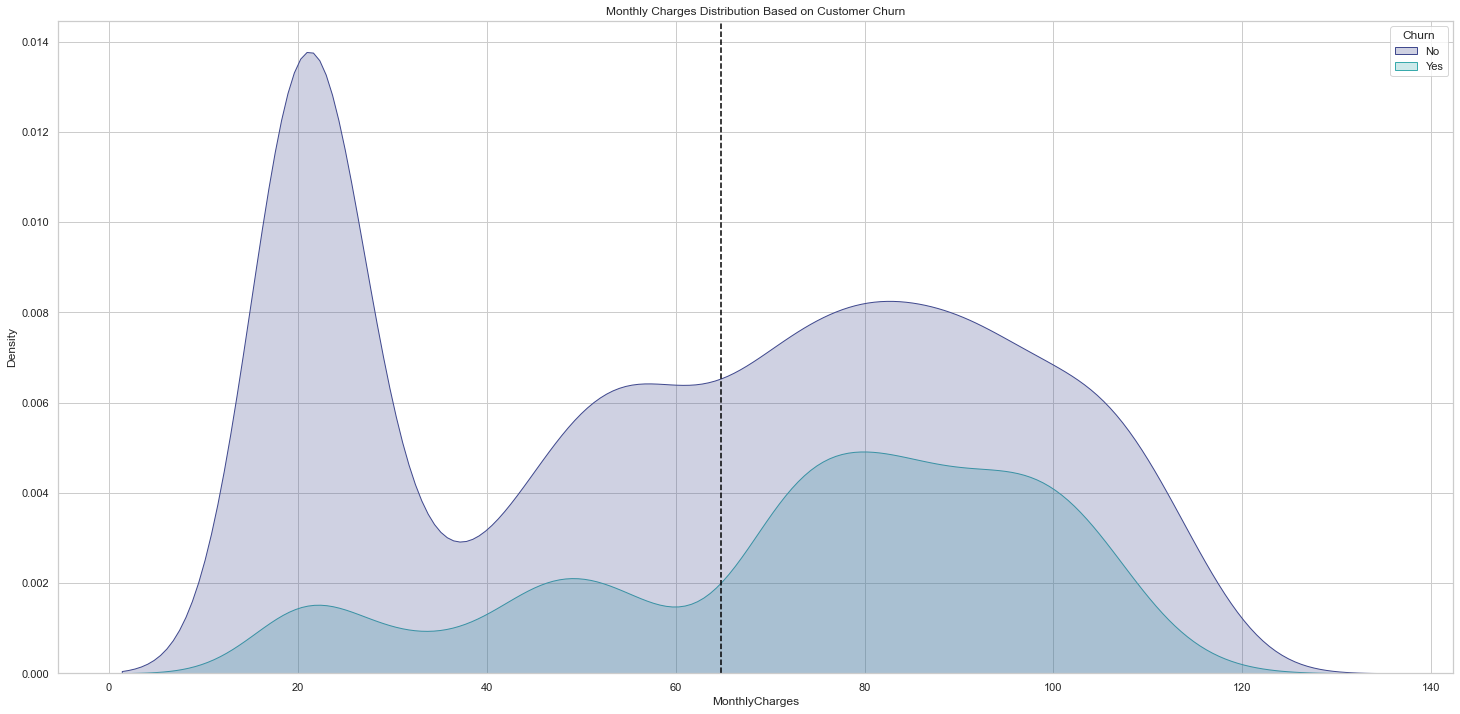

In [34]:
plt.figure(figsize=(25,12))
sns.kdeplot(df["MonthlyCharges"], hue=df["Churn"], fill=True, linewidth=1, palette='mako')
plt.axvline(df['MonthlyCharges'].mean(), c='black',ls='--')
plt.title("Monthly Charges Distribution Based on Customer Churn")

plt.show()


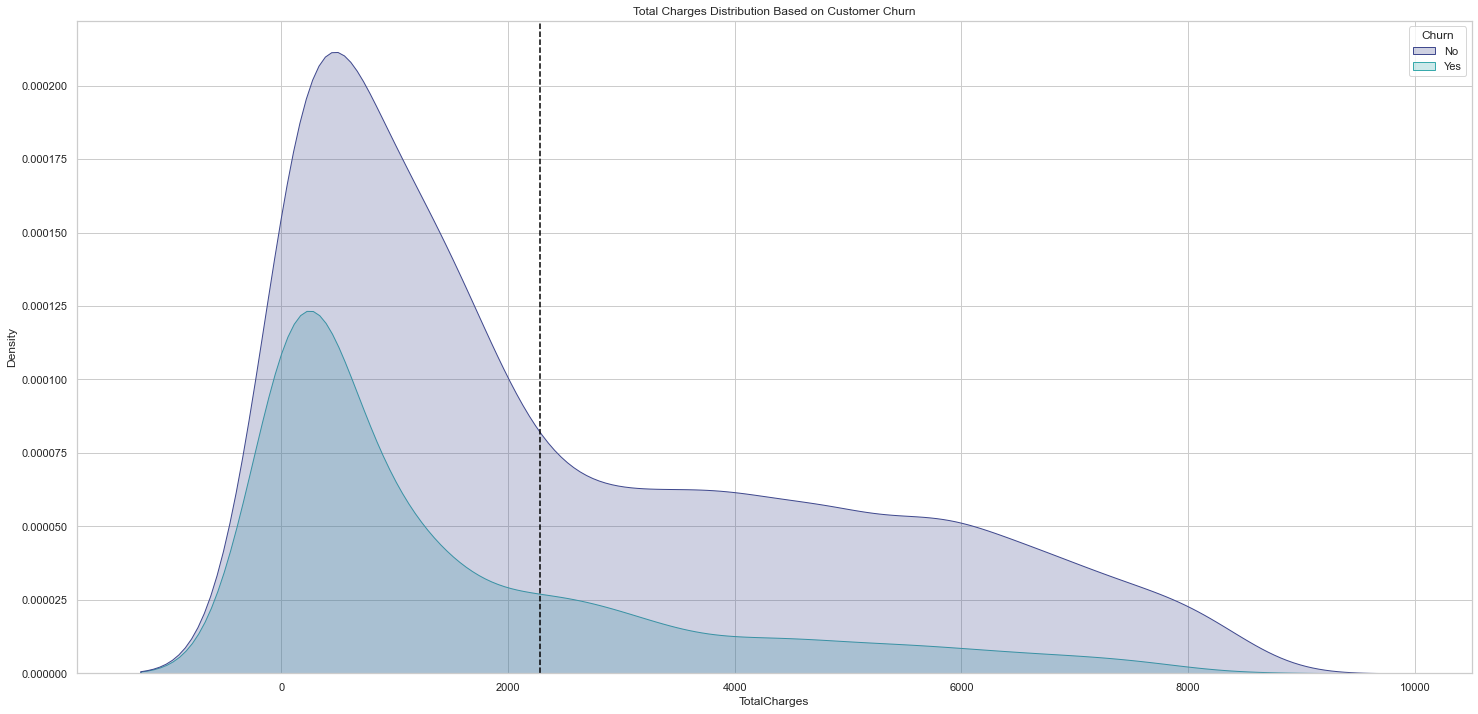

In [35]:
plt.figure(figsize=(25,12))
sns.kdeplot(df["TotalCharges"], hue=df["Churn"], fill=True, linewidth=1, palette='mako')
plt.axvline(df['TotalCharges'].mean(), c='black',ls='--')
plt.title("Total Charges Distribution Based on Customer Churn")

plt.show()

**Observations**
- Based on the graph above, lost customers tend to have low tenure. This shows that short contract duration leads to an increased likelihood of switching. Customers who have had a contract for a long time remain disproportionately loyal.
- As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.
- Based on the graph above, customers with low monthly charges have a tendency not to switch, while higher monthly charges are likely to make customers switch.


## Multivariate Analysis

### Tenure

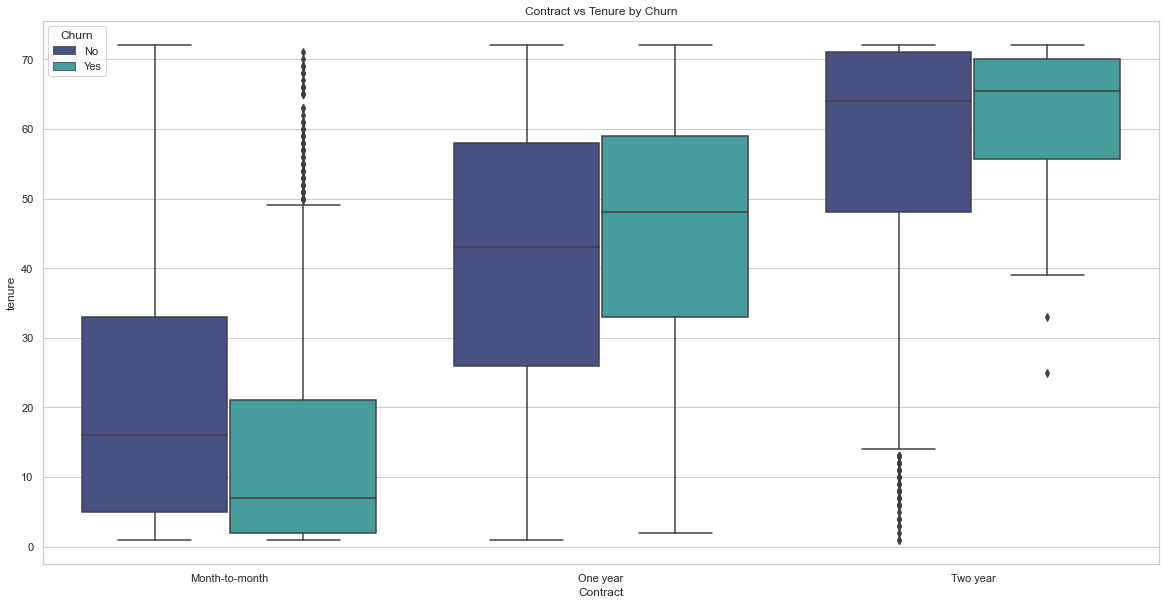

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Contract", y="tenure", hue='Churn', data=df, palette='mako')
plt.title('Contract vs Tenure by Churn')


plt.show()

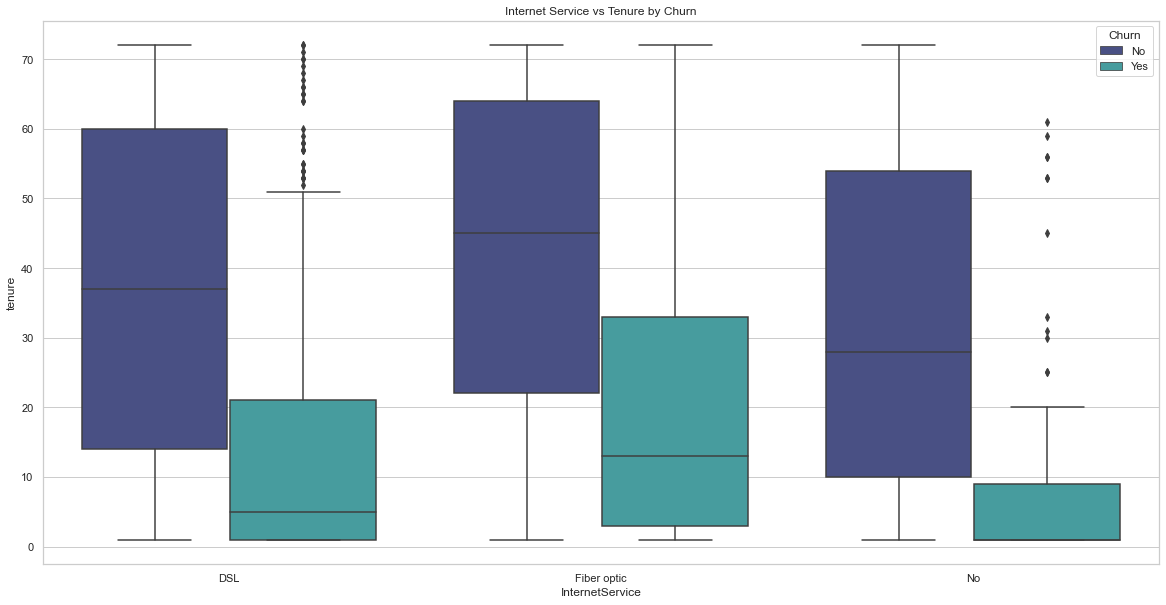

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(x="InternetService", y="tenure", hue='Churn', data=df, palette='mako')
plt.title('Internet Service vs Tenure by Churn')


plt.show()

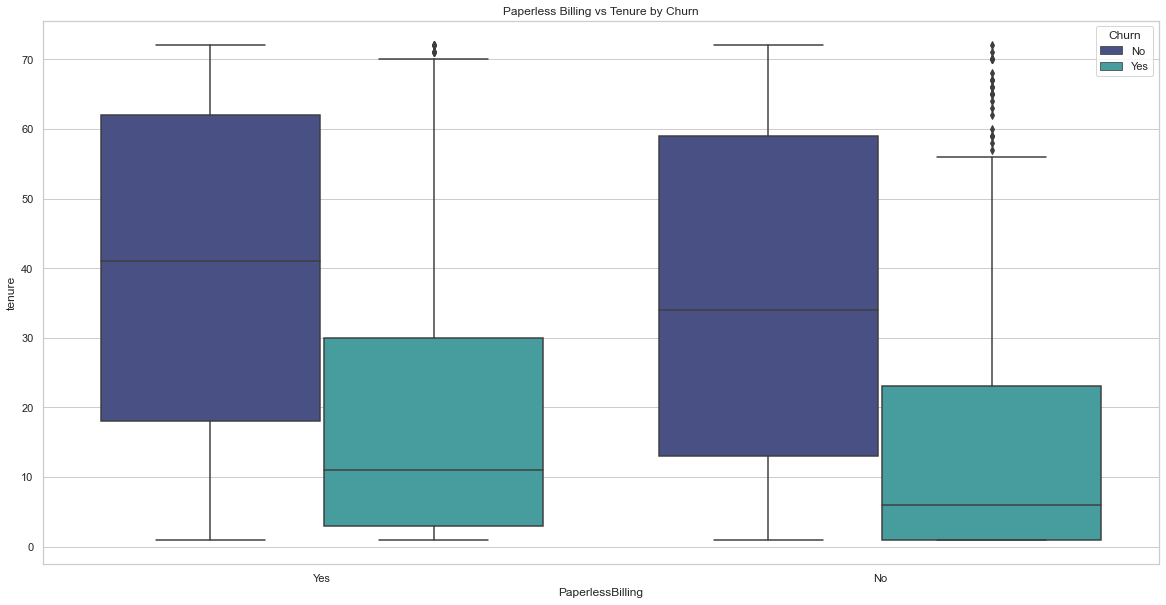

In [38]:
plt.figure(figsize=(20,10))
sns.boxplot(x="PaperlessBilling", y="tenure", hue='Churn', data=df, palette='mako')
plt.title('Paperless Billing vs Tenure by Churn')


plt.show()

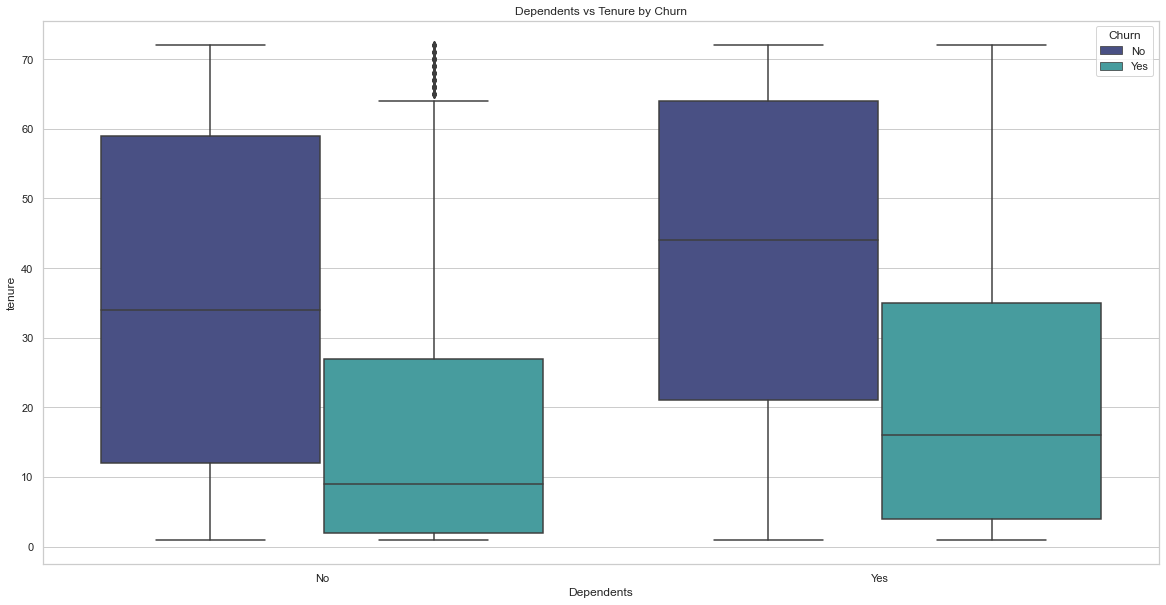

In [39]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Dependents", y="tenure", hue='Churn', data=df, palette='mako')
plt.title('Dependents vs Tenure by Churn')


plt.show()

### Total Charges

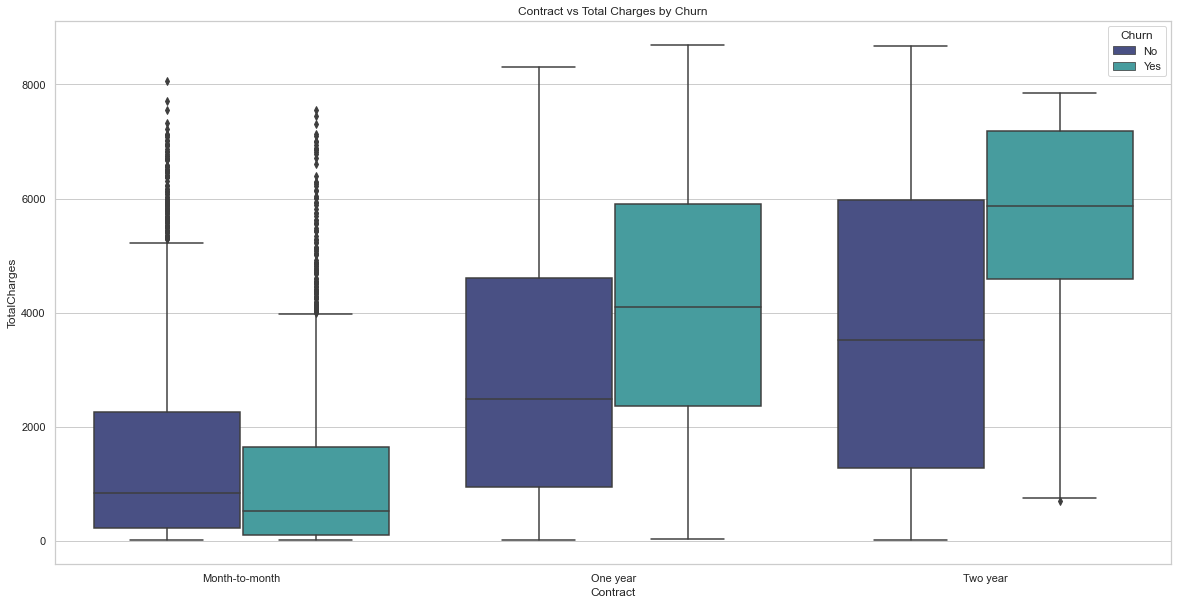

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Contract", y="TotalCharges", hue='Churn', data=df, palette='mako')
plt.title('Contract vs Total Charges by Churn')


plt.show()

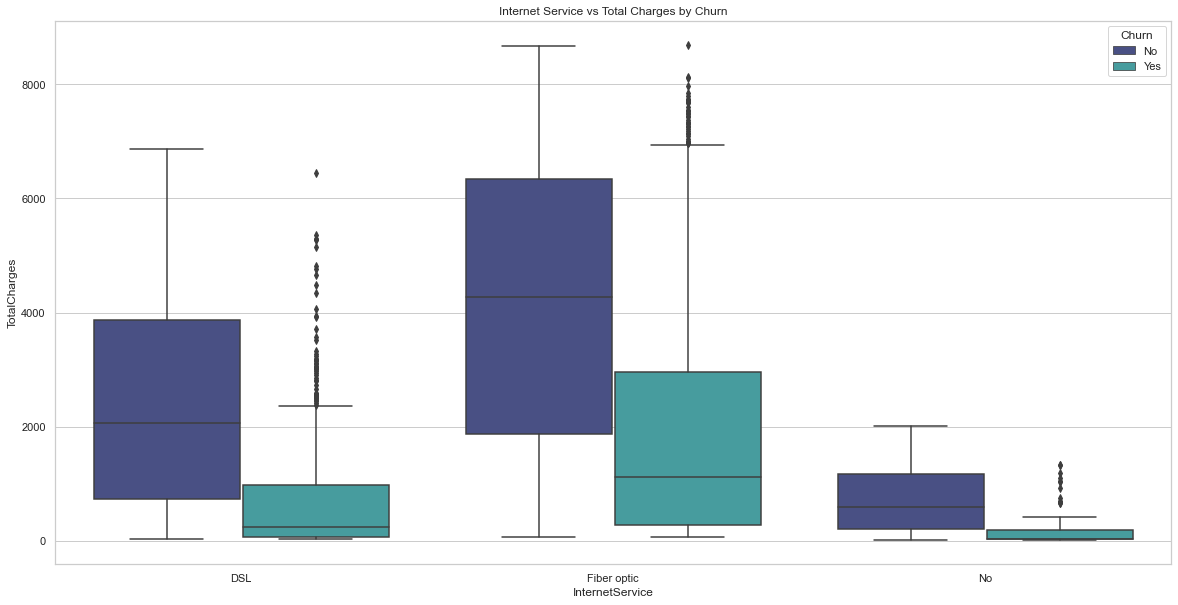

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(x="InternetService", y="TotalCharges", hue='Churn', data=df, palette='mako')
plt.title('Internet Service vs Total Charges by Churn')

plt.show()

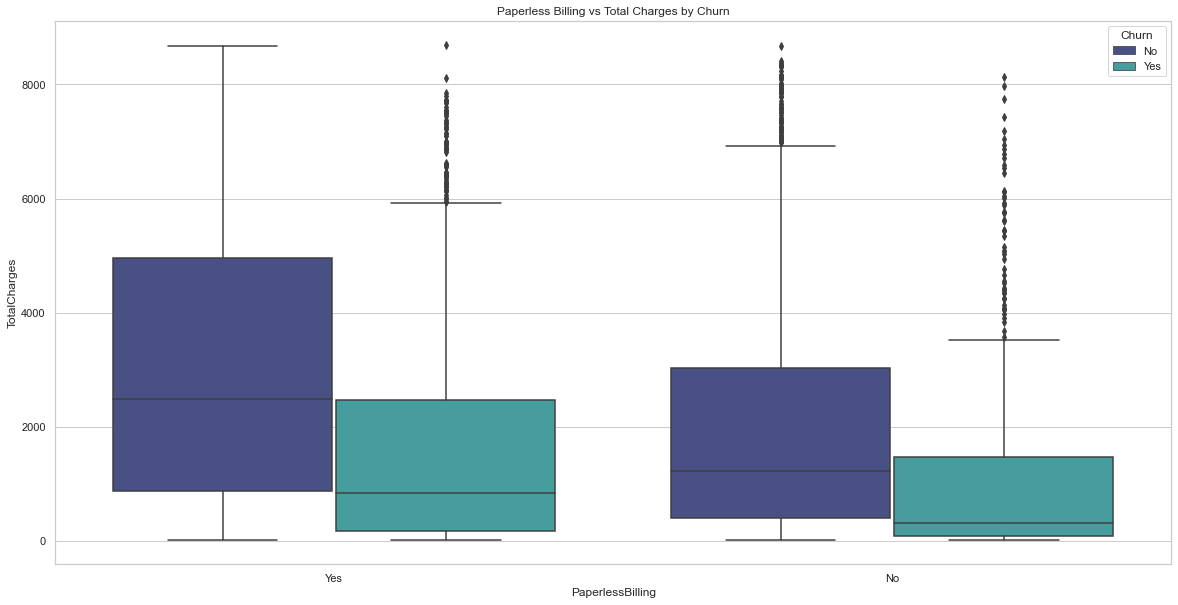

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x="PaperlessBilling", y="TotalCharges", hue='Churn', data=df, palette='mako')
plt.title('Paperless Billing vs Total Charges by Churn')

plt.show()

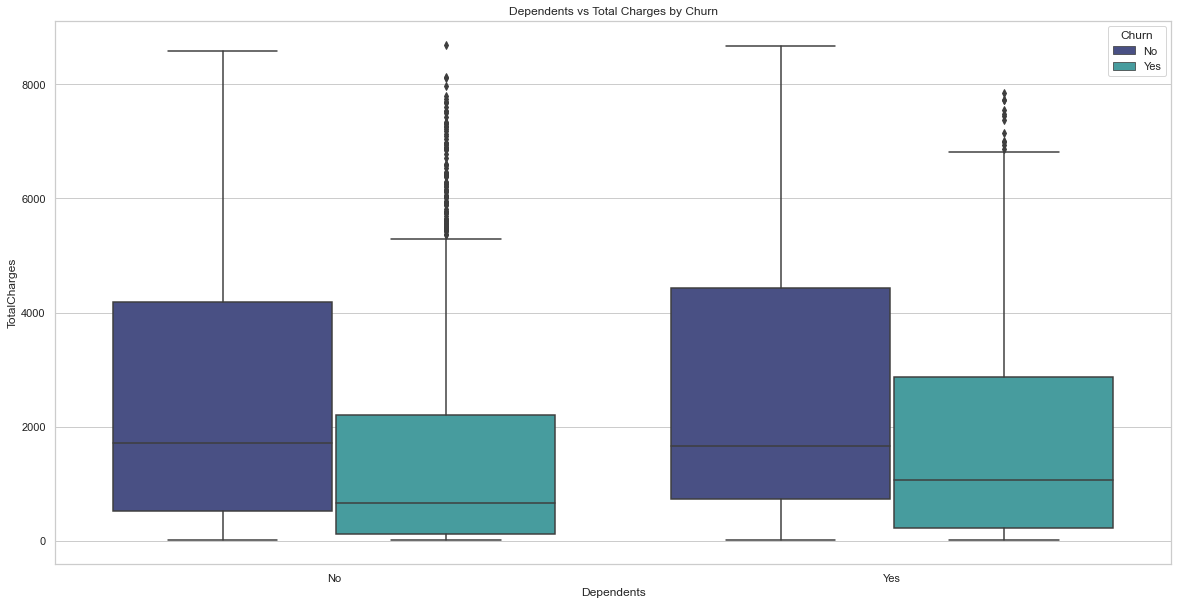

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Dependents", y="TotalCharges", hue='Churn', data=df, palette='mako')
plt.title('Dependents vs Total Charges by Churn')

plt.show()

### Monthly Charges

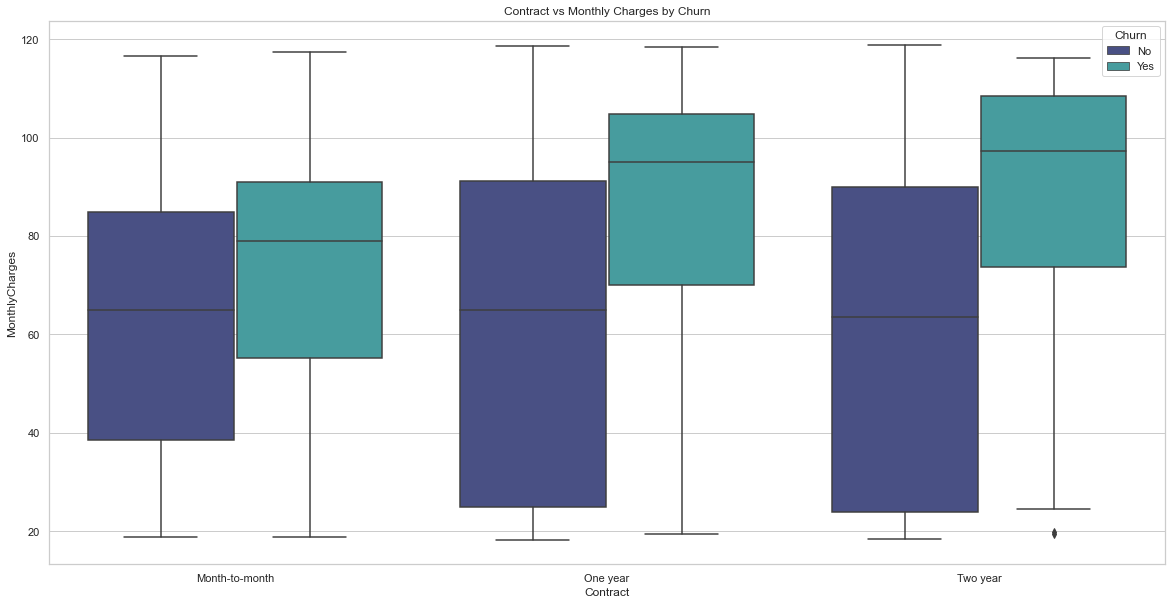

In [44]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Contract", y="MonthlyCharges", hue='Churn', data=df, palette='mako')
plt.title('Contract vs Monthly Charges by Churn')

plt.show()

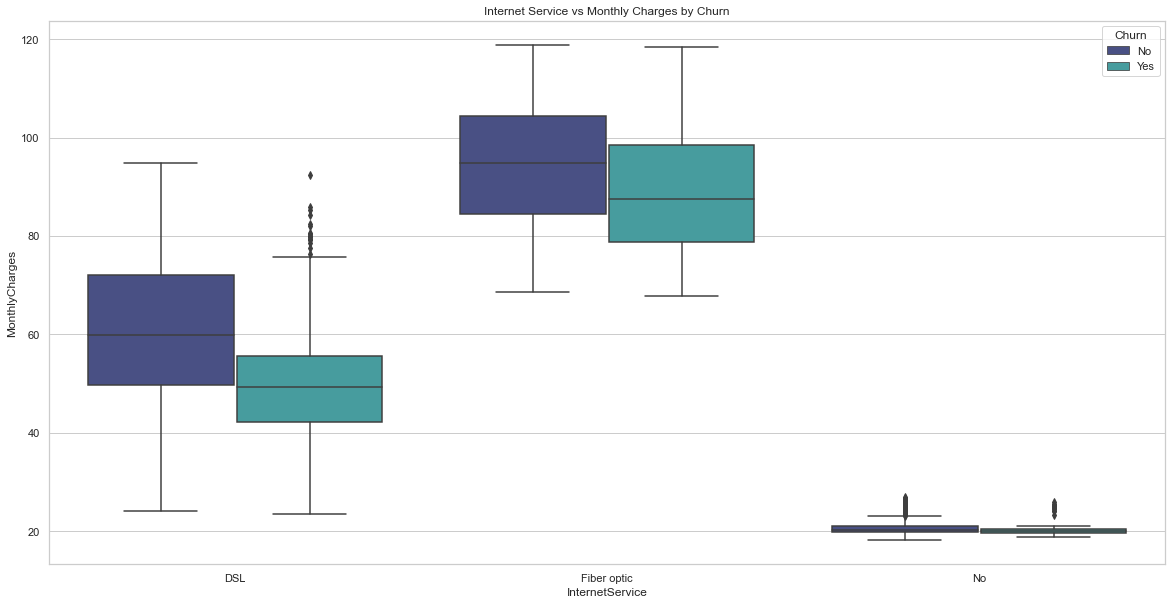

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(x="InternetService", y="MonthlyCharges", hue='Churn', data=df, palette='mako')
plt.title('Internet Service vs Monthly Charges by Churn')

plt.show()

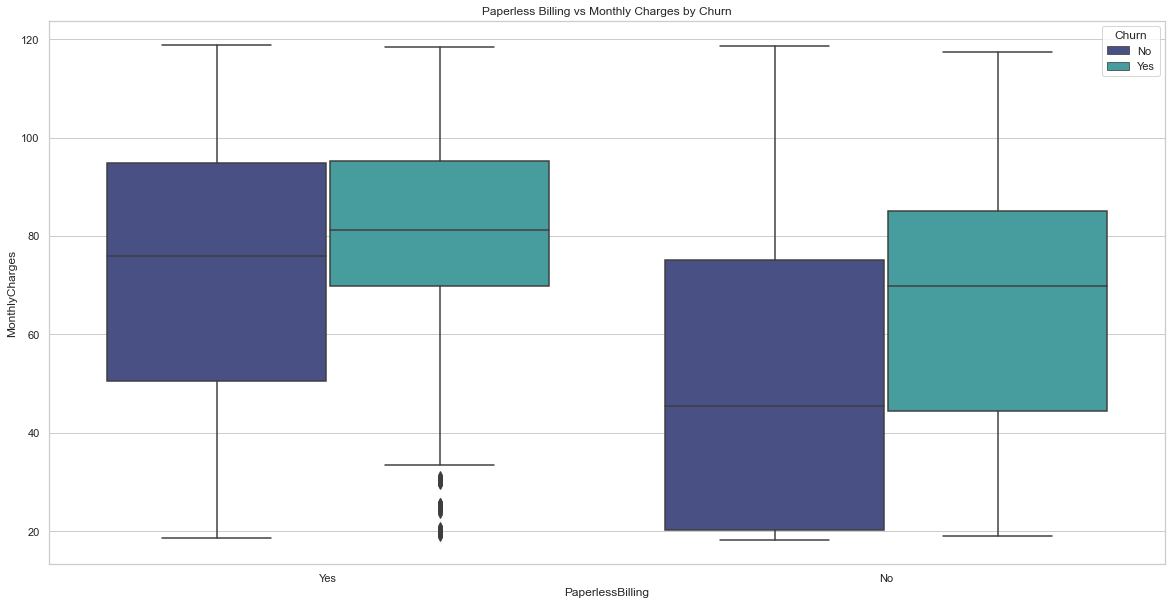

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(x="PaperlessBilling", y="MonthlyCharges", hue='Churn', data=df, palette='mako')
plt.title('Paperless Billing vs Monthly Charges by Churn')

plt.show()

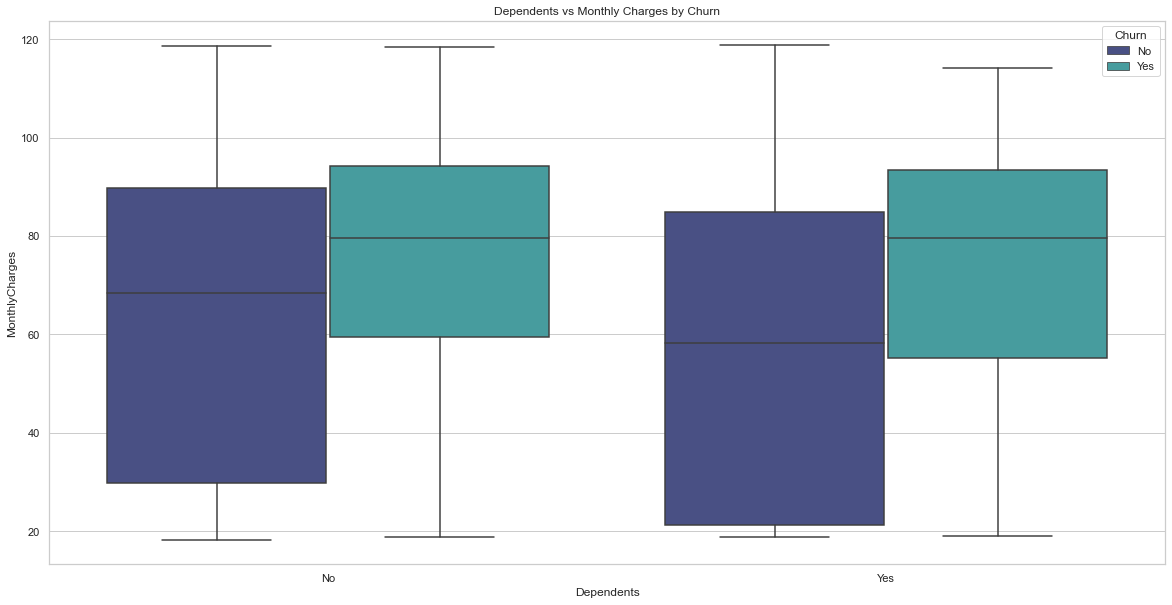

In [47]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Dependents", y="MonthlyCharges", hue='Churn', data=df, palette='mako')
plt.title('Dependents vs Monthly Charges by Churn')

plt.show()

**Observations:**
- Based on the month-to-month contract type, non-shifting customers have a higher tenure, higher total charges, and lower monthly charges than churn customers.
- Based on the category of dependents or not, both have non-shifting customers with higher tenure, higher total charges, and lower monthly charges than churn customers.
- We can see that tenure and total charges have a fairly strong positive relationship.

<Figure size 3600x2160 with 0 Axes>

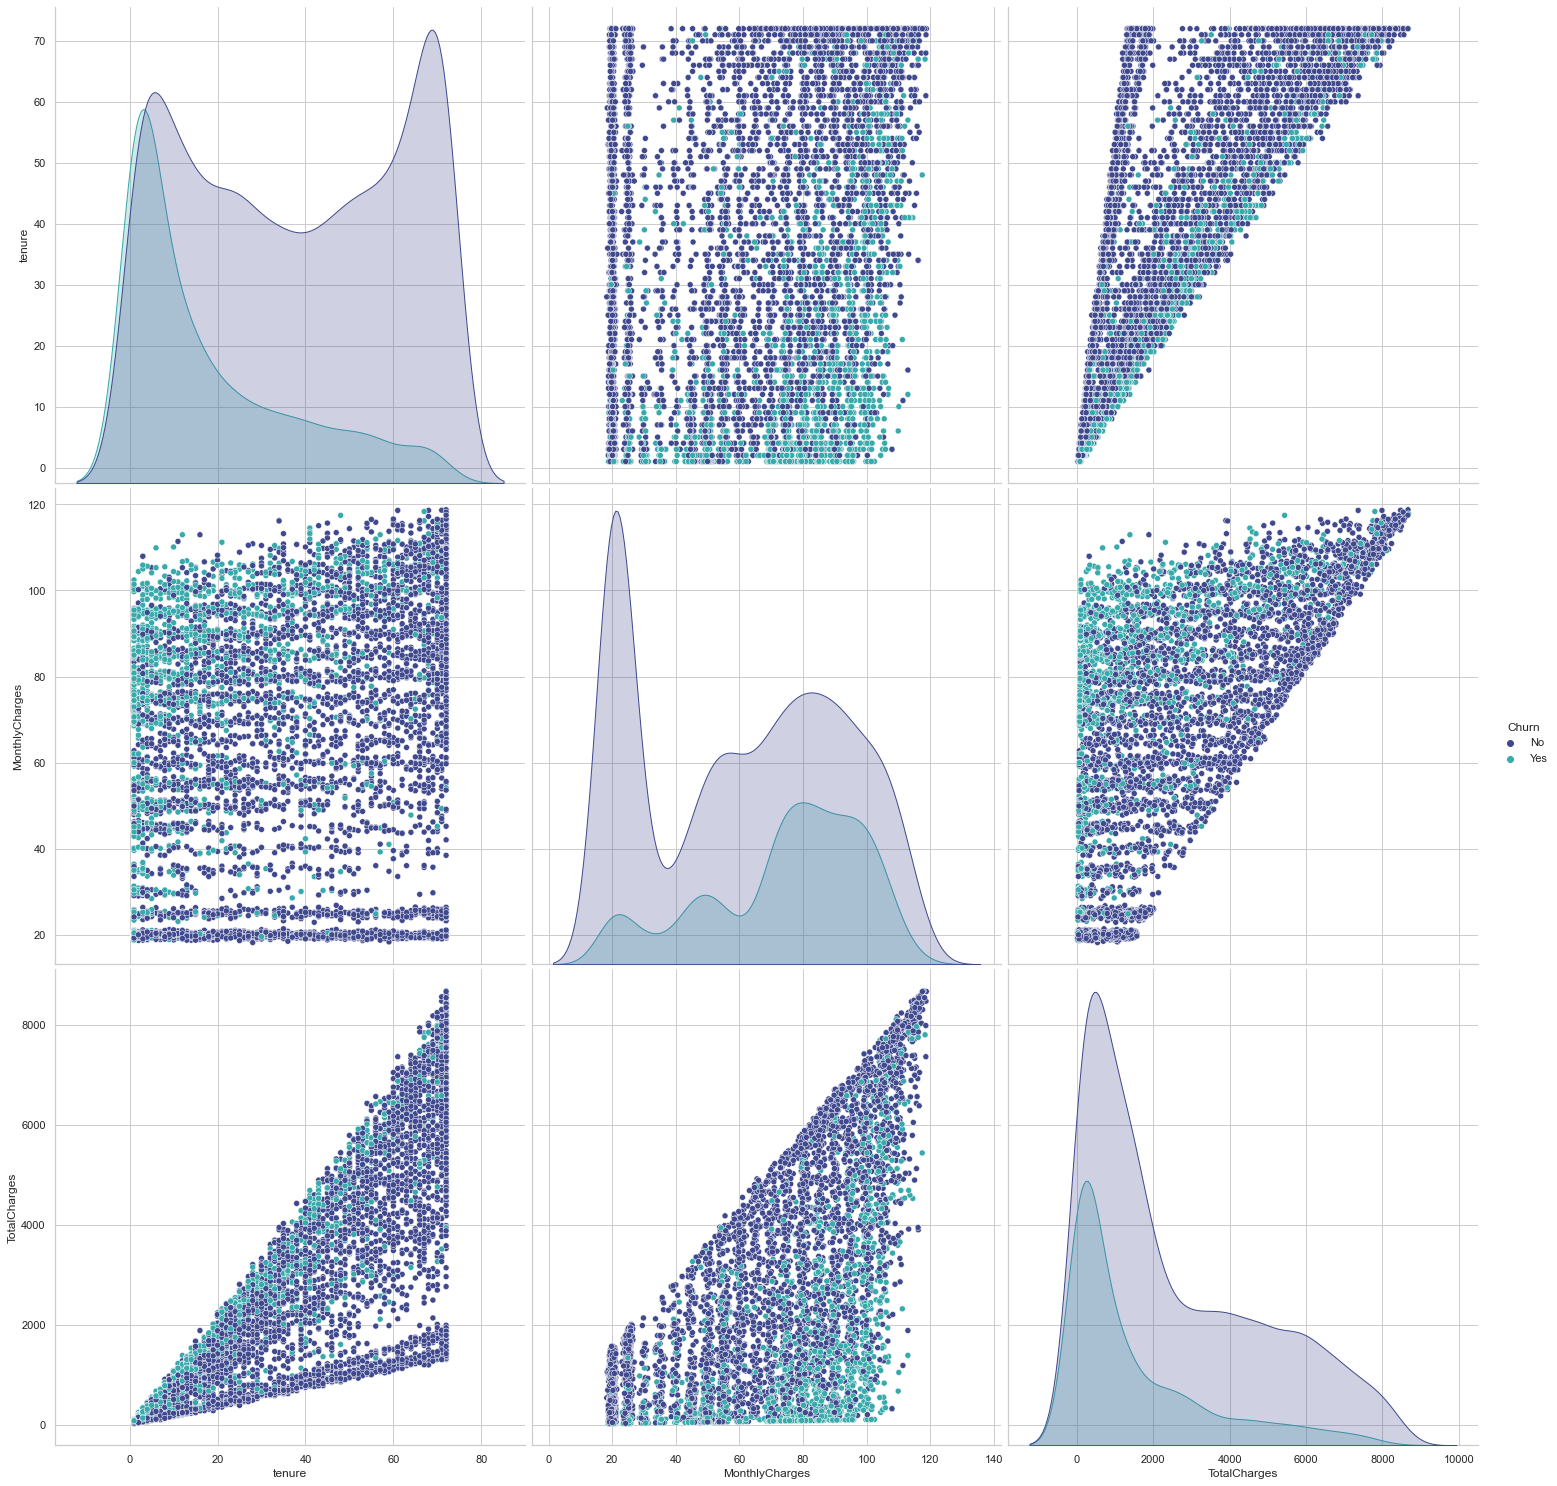

In [48]:
plt.figure(figsize=(50,30))
sns.pairplot(data=df,diag_kind = "kde",palette='mako',markers='o',size=7,hue = 'Churn')

plt.show()

### Correlation Matrix

<AxesSubplot:>

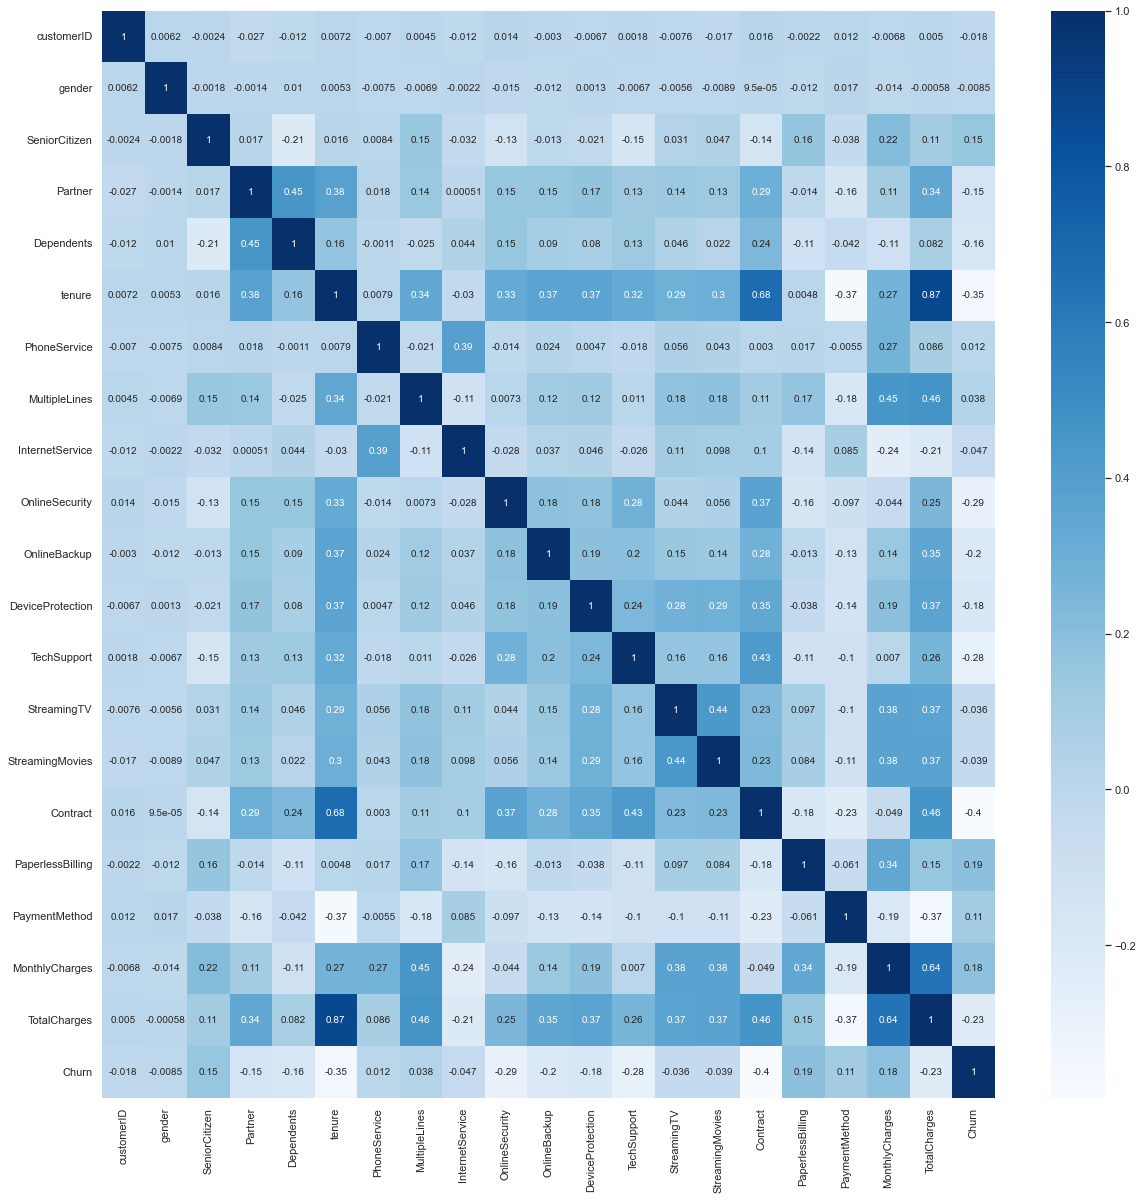

In [49]:
from sklearn.preprocessing import LabelEncoder
df_num = df.copy()

labelencoder=LabelEncoder()
for column in df_num.columns:
    df_num[column] = labelencoder.fit_transform(df_num[column])

plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(),cbar=True,annot=True,cmap='Blues')

**Observations:**
- Tenure has a strong correlation with monthly charges and contracts. 
- These two variables can be removed to test modeling with selected features to find out the effect of multicollinearity.